<div class="alert alert-block alert-info">
<b>Introduction :</b>

L'objectif de ce notebook est de vous expliquer d'une manière simplifier ce qu'est la p-value, quand l'utiliser et que révèle cet indicateur dans le cadre de la data science. Pour cela en préambule, il faut d'abord comprendre ce que représente une Loi Normale. Ce n'est pas si compliqué que ça vous verrez 🤓

Désolé si j'enfonce des portes ouvertes pour certains(es) mais je préfère commencer de zéro.
    </div>

<div class="alert alert-block alert-warning">
<b>Example :</b>
Commençons d'abord par importer les librairies puis on va créer disons 300 points d'une <b>variable àléatoire</b>.
    </div>

In [ ]:
# import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import pylab
import scipy.stats as stats
from scipy.stats import shapiro
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown, Button, HBox, VBox
import ipywidgets as widgets

In [ ]:
# Paramètres de la distribution normale
moyenne = 0  # Moyenne
ecart_type = 1  # Écart-type

# Nombre de points aléatoires à générer
nombre_points = 500

# Générer la liste de points aléatoires suivant une distribution normale
points = np.random.normal(moyenne, ecart_type, nombre_points)

<div class="alert alert-block alert-success">
Voilà c'est fait ! Bon je ne vais pas vous expliquer dans le detail ce qu'est une <b> variable àléatoire</b>, mais il faut juste imaginer qu'on a "pioché" au hasard ces chiffres. 
    </div>

<div class="alert alert-block alert-info">
Vous remarquerez aussi que j'ai demandé une valeur moyenne à 0 et un écart type à 1. C'est pour simplifier notre exemple mais cette valeur moyenne et cet écart type on de l'importance qu'on verra un peu plus tard 😌 
    </div>

<div class="alert alert-block alert-warning">
<b>Example :</b>
Maintenant essayons de faire un nuage de points (scatter plot) afin d'observer à quoi cela ressemble
    </div>

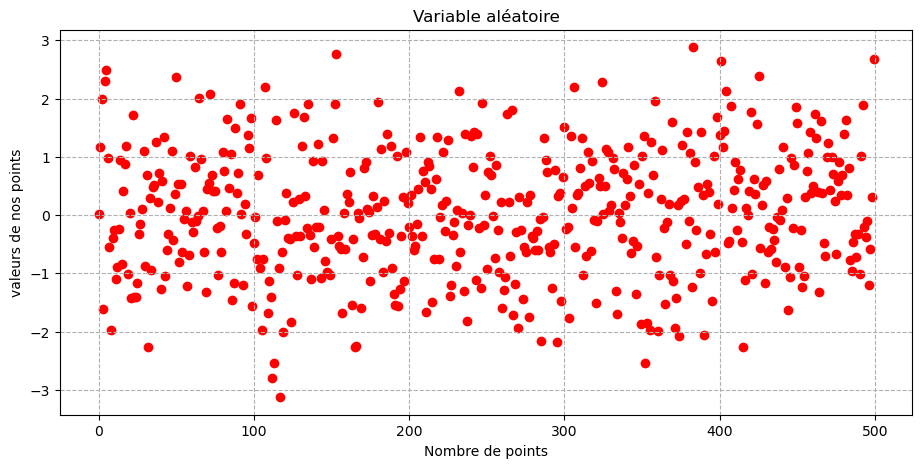

In [ ]:
# création d'un dataframe avec les variables aléatoires
df = pd.DataFrame({'points': points})

plt.figure(figsize=(11, 5))
plt.scatter(df.index, df.points, c='red')
plt.xlabel('Nombre de points')
plt.ylabel('valeurs de nos points')
plt.title('Variable aléatoire')
plt.grid(True, linestyle = '--')

<div class="alert alert-block alert-info">
On a déjà quelque chose de plus visuel et on observe bien que tous les points sont distribués aléatoirement autour de 0. Voilà pourquoi on a imposé <b>une moyenne à 0</b> plus haut.

Une autre façon de représenter ce nuage de point est la [boîte de tukey](https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches). Cette représentation est vraiment très pratique parce qu'elle nous donne en un coup d'oeil les valeurs statistiques de notre nuage de points. Essayons de tracer cette fameuse "boite à moustache".

Ci-dessous comment la lire et le code pour tracer cette boite à moustage
    </div>

<img src= "https://www150.statcan.gc.ca/edu/power-pouvoir/fig/fig04-5-2-1-fra.png">

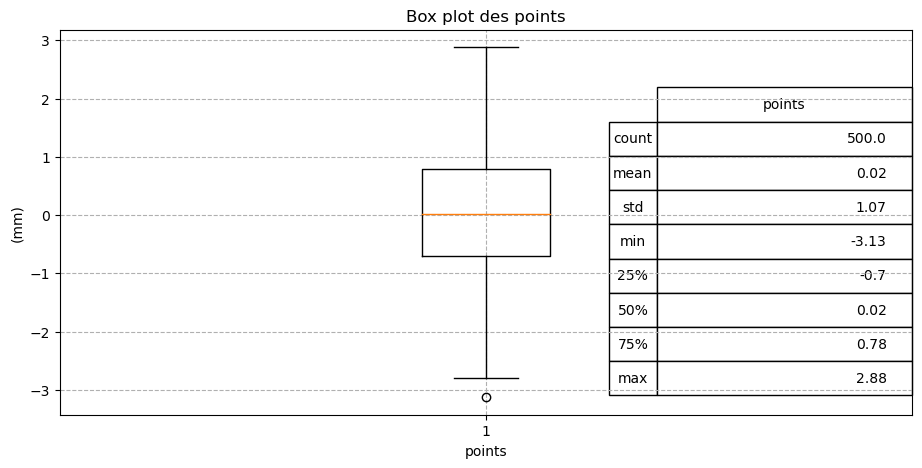

In [ ]:
# boxplot
plt.figure(figsize=(11, 5))
plt.boxplot([df.points])
plt.xlabel('points')
plt.ylabel('(mm)')
plt.title('Box plot des points')
plt.grid(True, linestyle = '--')

# tableau des valeurs statistiques
statData = pd.DataFrame(df['points'].describe())
plt.table(cellText=statData.values.round(2),
          rowLabels=statData.index,
          colLabels = statData.columns,
          cellLoc = 'right',
          rowLoc = 'center',
          loc='right', bbox=[.7,.05,.3,.8]);

<div class="alert alert-block alert-info">
On a déjà un peu plus d'informations comme les <b>interquartile, la médiane, le min et le max</b>. 
Jusque-là on est toujours dans la phase de statistique descriptive. Essayons de tracer la distribution de ce nuage de points pour voir à quoi cela ressemble, commençons d'abord par faire un <b>histogramme des points</b>
    </div>

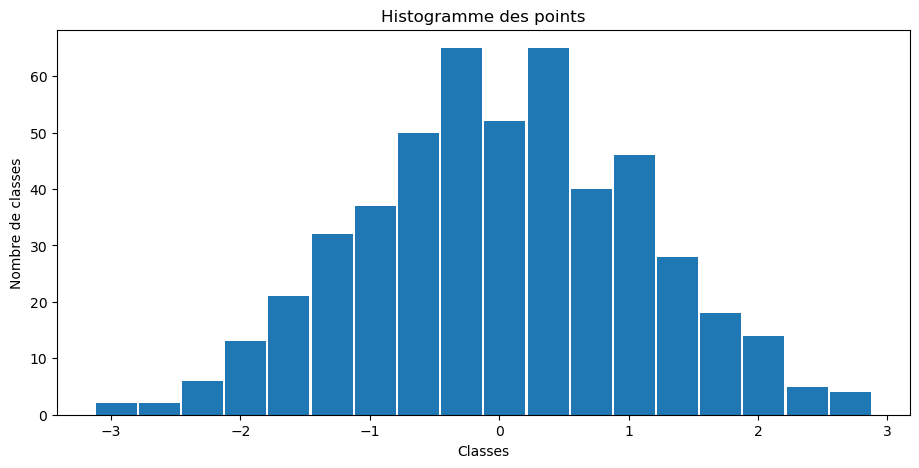

In [ ]:
plt.figure(figsize=(11, 5))
plt.hist(df.points, bins=18, rwidth=0.95)
plt.xlabel('Classes')
plt.ylabel('Nombre de classes')
plt.title('Histogramme des points');

<div class="alert alert-block alert-info">
On observe que chaque classe est distribuée autour de la moyenne et que cela suit une courbe en cloche. Essayons maintenant de tracer cette courbe en cloche
    </div>

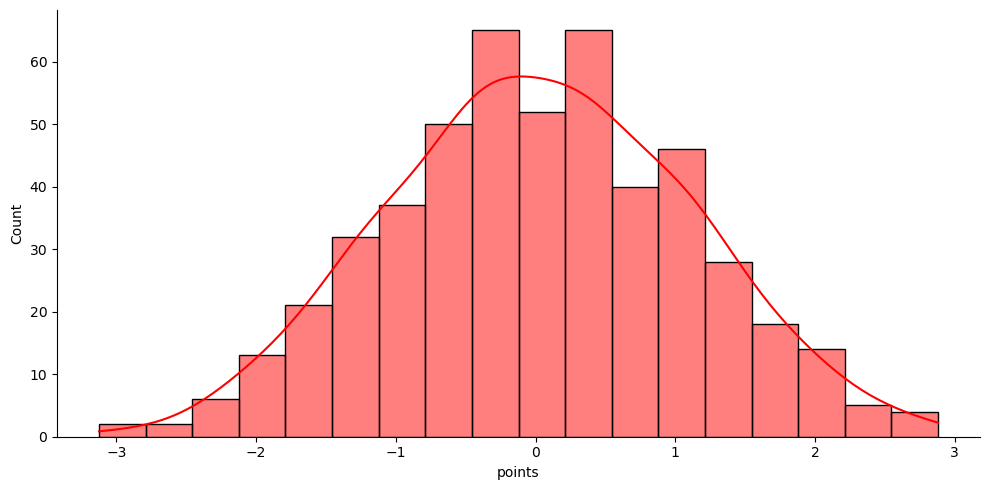

In [ ]:
sns.displot(df.points, bins=18, kde=True, color='red', height=5, aspect=2);

<div class="alert alert-block alert-success">
On observe enfin cette fameuse courbe en cloche qui suit les classes de chaque point, c'est ça qu'on appelle la gaussienne!
</div>
<div class="alert alert-block alert-info">
    
* Chaque classe est un domaine de valeurs, par exemple la classe [0 , 1] dénombre toutes les valeurs comprise entre 0 et 1

* L'ensemble des points sont distribué entre le max et le min.

* La gaussienne est toujours centré sur la moyenne

* la taille de la gaussienne (plus ou moins serré ou large) est lié à l'écart type ou dispersion des valeurs

Ce qu'il faut retenir c'est qu'on a généré des points de manière **aléatoire** totalement due au hasard, et que ces points semblent suivre une **loi Normale**

Pour être sure que nos points suivent une **loi Normale**, en d'autres mots qu'ils sont bien dû au **"hasard"** il existe plusieurs outils mais on va se focaliser sur deux outils, le premier c'est le qq-plot et le second la p-value.
</div>
<div class="alert alert-block alert-warning">
Commencons pas le QQ-plot
</div>

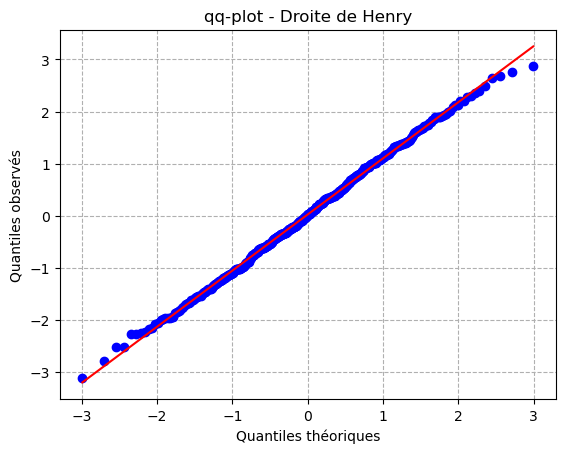

In [ ]:
stats.probplot(df.points, dist="norm", plot=pylab)

plt.xlabel('Quantiles théoriques')
plt.ylabel('Quantiles observés')
plt.title('qq-plot - Droite de Henry')
plt.grid(True, linestyle = '--')

<div class="alert alert-block alert-info">
Alors, quelques explications, un QQ-plot pour Quantil Quantil Plot est une comparaison depuis l'axe des abscisses des quantiles théoriques et selon l'axe des ordonnées les quantiles observés (nos points créent de manière aléatoire). Pour etre plus clair, imaginé que l'on compare une gaussienne de moyenne = 0 avec une dispersion = 1 théorique avec vos valeurs, c'est à dire la série de données df[points]<br>
    
Si les deux distributions sont similaires, les points du QQ-plot seront alignés sur une ligne diagonale. Cela indique que les quantiles de la variable observée correspondent aux quantiles théoriques de la distribution.<br>

<br>
La droite qui passe par tous les points se nomme la droite de Henry.


En résumé, un QQ plot permet de visualiser si une variable suit une distribution théorique en comparant les quantiles observés et les quantiles théorique. S'il y a une correspondance étroite entre les deux, cela suggère que la variable suit approximativement la distribution théorique.<br>
<br>
C'est un moyen graphique très rapide et puissant pour observé si la distribution de nos points suit une loi Normale ou pas.

Je vous ai mis ci-dessous trois exemples de distribution avec les qq-plot correspondant, dans le cas ou la distribution suit une loi Normale, ou si on est décalé vers la droite ou vers la gauche
    </div>

<img src= "https://www.learnbyexample.org/wp-content/uploads/r/typical-quantile-quantile-qq-plot.png">

<div class="alert alert-block alert-info">
Et la p-value ? On y arrive !

C'est aussi un indicateur permettant de savoir si les points suivent une loi Normale ou pas. Plus précisement un test d'hypothèse. 
</div>
<div class="alert alert-block alert-warning">
Essayons déjà de calculer la p-value de notre série de valeurs.
</div>

In [ ]:
# normality test
stat, p = shapiro(df['points'])
print('Statistics=%.3f, p=%.5f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0) with Statistics=%.3f, p=%.5f' % (stat, p))
else:
    print('Sample does not look Gaussian (reject H0) with Statistics=%.3f, p=%.5f' % (stat, p))

Statistics=0.998, p=0.77963
Sample looks Gaussian (fail to reject H0) with Statistics=0.998, p=0.77963


<div class="alert alert-block alert-info">
En général la p-value s'utilise avec un test d'hypothèse. Je ne vais pas rentrer dans les détails concernant ce test d'hypothèse mais retenez que la p-value s'utilise dans ce cas. La p-value est un indicateur de confiance, elle permet de savoir si vos valeurs "semblent" suivre une loi Normale ou pas. En général le seuil est de 0,05.<br>
<br>
Si la p-value est faible (généralement inférieur à un seuil prédéfini, par exemple 0,05) cela suggère qu'il y a des preuves statistiques suffisantes pour conclure que les données ne suivent pas une loi Normale. En outre, si la p-value est supérieur à 0,05, alors il est probable que les données suivent une loi Normale<br>
<br>
Cependant, il est important de noter que la p-value seule ne fournit pas une mesure de l'importance ou de la signification pratique des résultats, mais plutôt une mesure de la confiance dans les résultats statistiques.<br>
<br>
Donc la p-value peut être une donnée complementaire aux indicateurs statistique descriptifs (mean, med, min, max, std) pour vous indiquer si vos variables suivent des variations dites "naturelle" ou due au "hasard".
</div>
<div class="alert alert-block alert-warning">
On va terminer notre exemple avec un tableau résumé
</div>

In [ ]:
# calcul de la p-value
stat, p = shapiro(df['points'])

# affectation des valeurs stats
summary = df.describe()

# Ajouter une ligne avec une valeur spécifique
summary.loc['p-value'] = [p]

# Afficher le DataFrame avec la ligne ajoutée
pd.DataFrame(summary).T

count      mean       std       min       25%       50%       75%  \
points  500.0  0.023982  1.074748 -3.125254 -0.702339  0.022678  0.783208   

             max   p-value  
points  2.880027  0.779629

<div class="alert alert-block alert-info">
En résumé, les **visualisations** ainsi que la **p-value** sont complémentaires. L'observatioin de deux variables quantitative via un nuage de points peut être complétée par une boite de tukey et un histogramme afin d'évaluer leur variation naturelle ou non. <br>

Les indicateurs utilisés afin de vérifier si la variation suit une **loi Normale** ou non sont le **QQ-plot** associé à la droit de Henry ainsi que la **p-value**. Cela vous permettra de savoir si la variation des valeurs est causée par le hasard ou non.
    </div>
<div class="alert alert-block alert-success">
Vous trouverez ci-dessous le code pour generer les graphiques et jouer avec les paramètres pour vous rendre compte de l'influence de la distribution des données. A vous de jouer !
    </div>

In [1]:
# Fonction pour générer les graphiques et le tableau
def generate_plots_and_table(mean, std, num_points, point_type):
    # Générer les données en fonction du type de points
    if point_type == 'Aléatoire':
        data = np.random.normal(mean, std, num_points)
    elif point_type == 'Proportionnelle':
        data = np.linspace(mean - 3*std, mean + 3*std, num_points)
    elif point_type == 'Exponentielle':
        data = np.random.exponential(scale=std, size=num_points) + mean
    elif point_type == 'Logarithmique':
        data = np.random.lognormal(mean=mean, sigma=std, size=num_points)

    # Créer la figure et les axes
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs = axs.flatten()

    # Nuage de points
    axs[0].scatter(range(len(data)), data)
    axs[0].set_title('Nuage de points')
    
    # Boxplot
    sns.boxplot(data, ax=axs[1])
    axs[1].set_title('Boxplot')
    
    # Histogramme
    axs[2].hist(data, bins=12)
    axs[2].set_title('Histogramme')

    # QQ-plot
    stats.probplot(data, dist="norm", plot=axs[3])
    axs[3].set_title('QQ-plot')

    # Ajuster les espacements entre les sous-graphiques
    plt.tight_layout()

    # Créer le tableau des indicateurs statistiques et la p-value
    statistics = {
        'Moyenne': np.mean(data),
        'Écart-type': np.std(data),
        'Minimum': np.min(data),
        'Maximum': np.max(data),
        'Médiane': np.median(data),
        'P-value': stats.normaltest(data)[1]
    }
    statistics_table = pd.DataFrame(statistics, index=[0])

    # Afficher le tableau
    display(statistics_table)

# Définir les widgets
mean_slider = FloatSlider(min=-10, max=10, step=0.1, value=0, description='Moyenne:')
std_slider = FloatSlider(min=0.1, max=5, step=0.1, value=1, description='Écart-type:')
num_points_slider = IntSlider(min=10, max=1000, step=10, value=100, description='Nombre de points:')
point_type_dropdown = Dropdown(options=['Aléatoire', 'Proportionnelle', 'Exponentielle', 'Logarithmique'], description='Type de points:')

# Fonction de rappel pour les widgets
def update_plots_and_table(mean, std, num_points, point_type):
    generate_plots_and_table(mean, std, num_points, point_type)

# Associer la fonction de rappel aux widgets
widgets.interact(update_plots_and_table, mean=mean_slider, std=std_slider, num_points=num_points_slider, point_type=point_type_dropdown)

# Afficher les widgets
controls = HBox([mean_slider, std_slider, num_points_slider, point_type_dropdown])

NameError: ignored

<div class="alert alert-block alert-success">
Aprés avoir fait un scatter plot, boxplot, et histogramme de notre série de valeurs et si on essayait avec le dataset temperature. Je vous propose des exemples de code ci-dessous. Attention à bien spécifier le chemin du dataset si vous souhaitez l'executer depuis votre environnement.
    </div>

In [ ]:
data = pd.read_csv("datas (1).csv") # chargement des données dans un df
data = data.drop(['iso_code', 'gdp'], axis=1) # suppression de la colonne iso_code et gdp

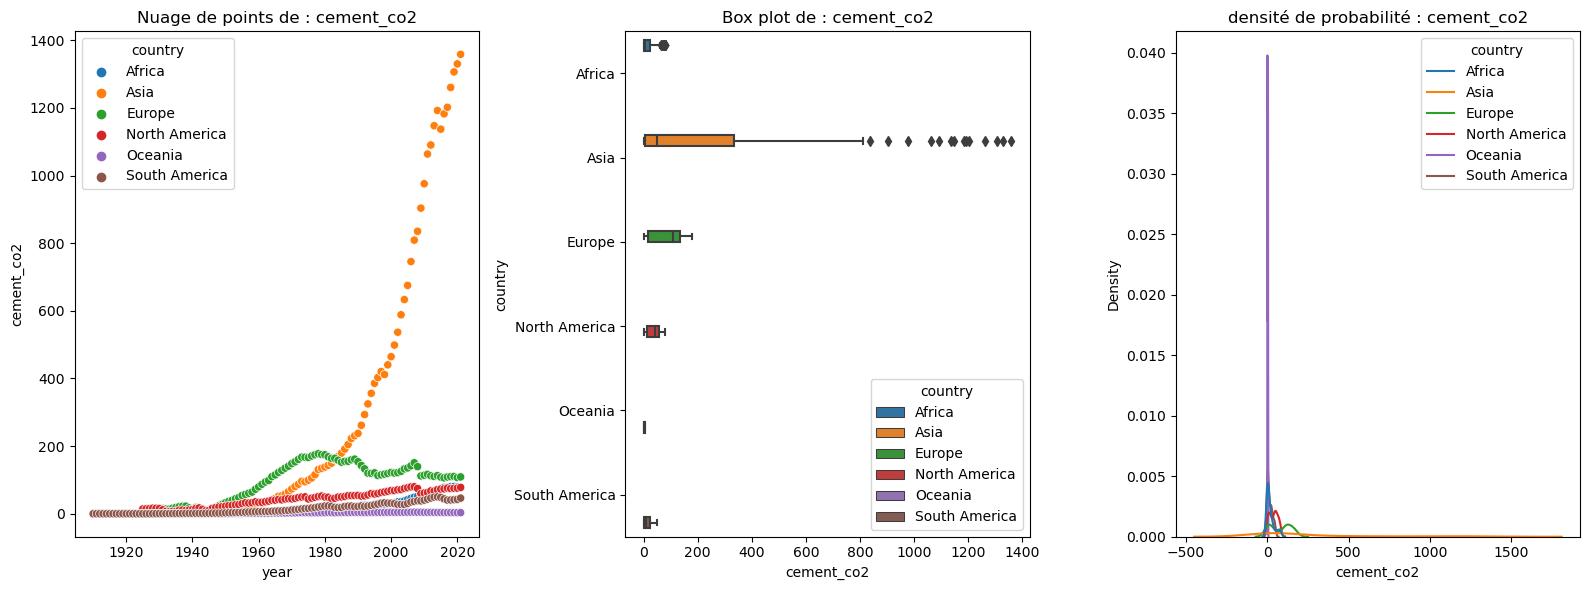

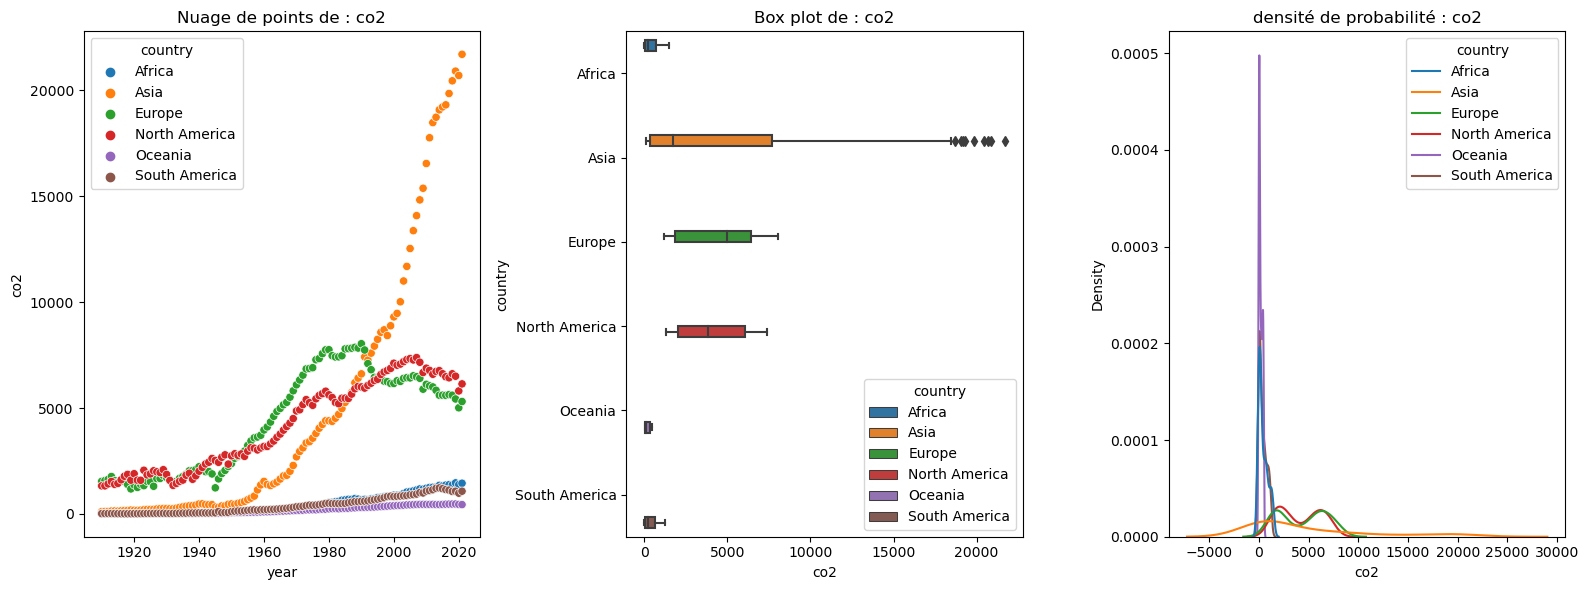

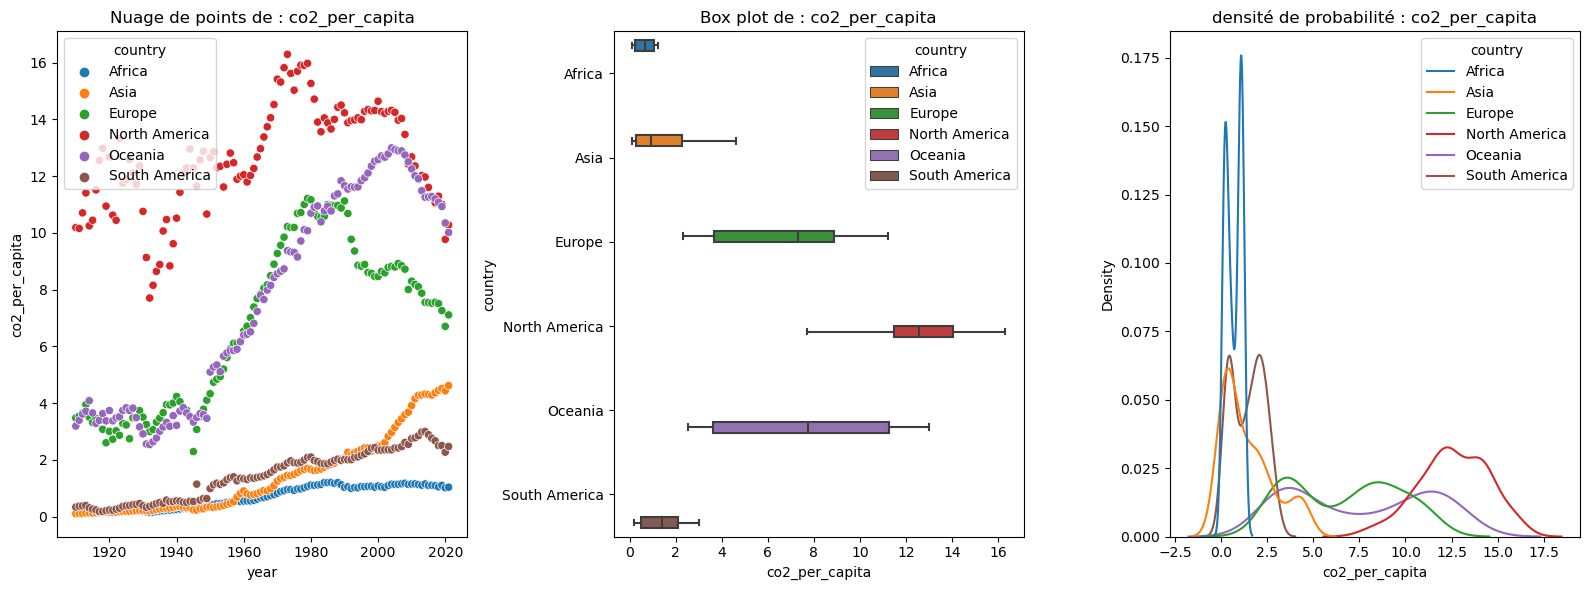

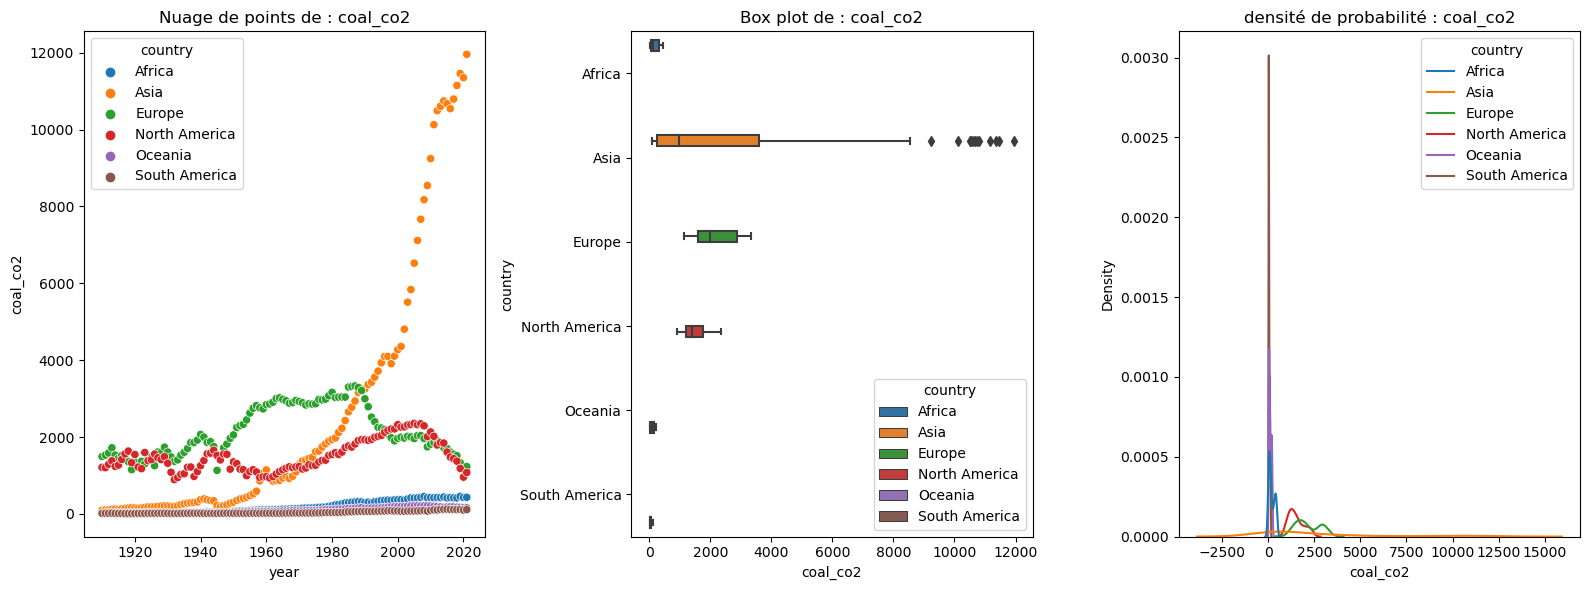

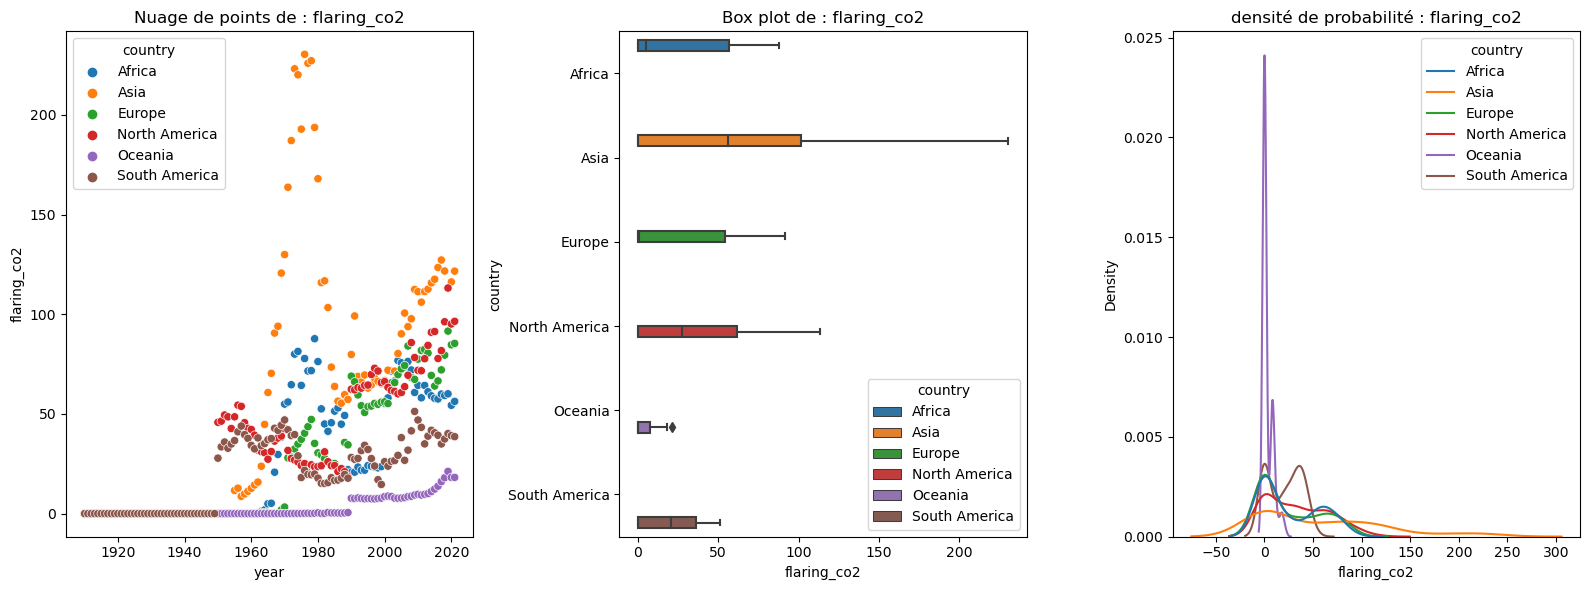

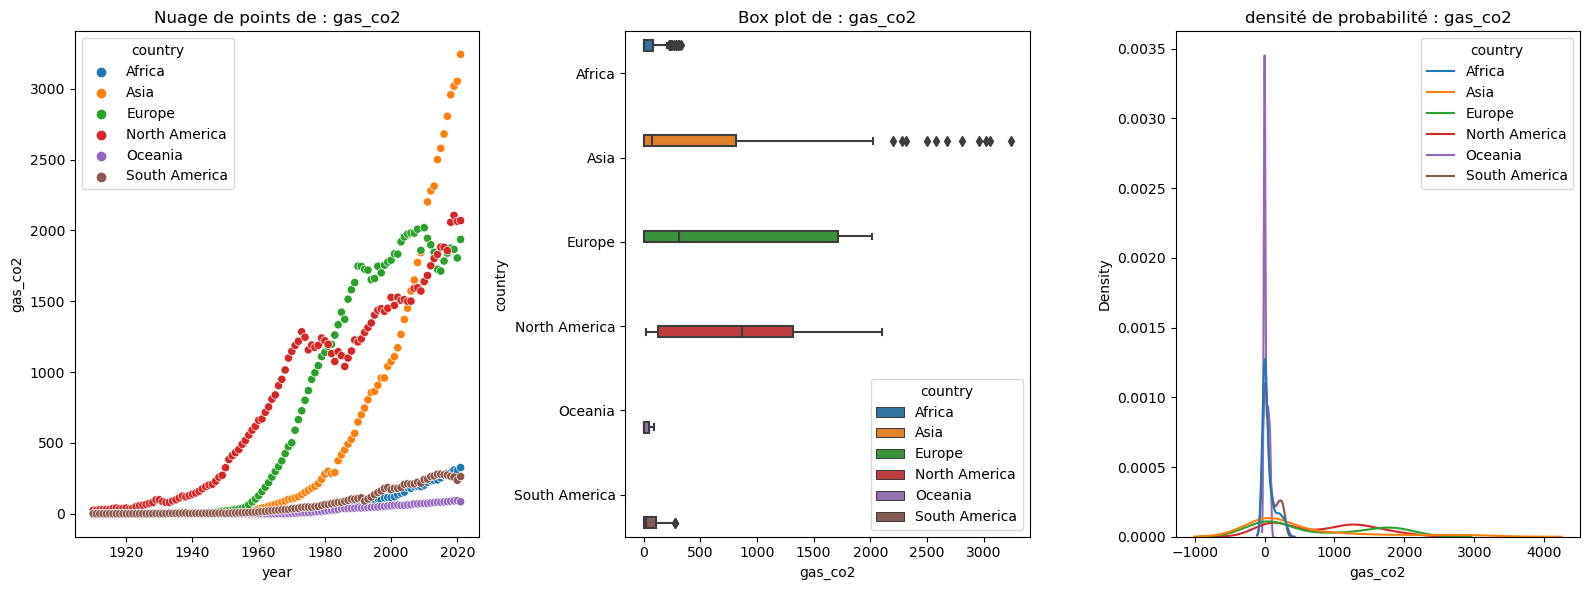

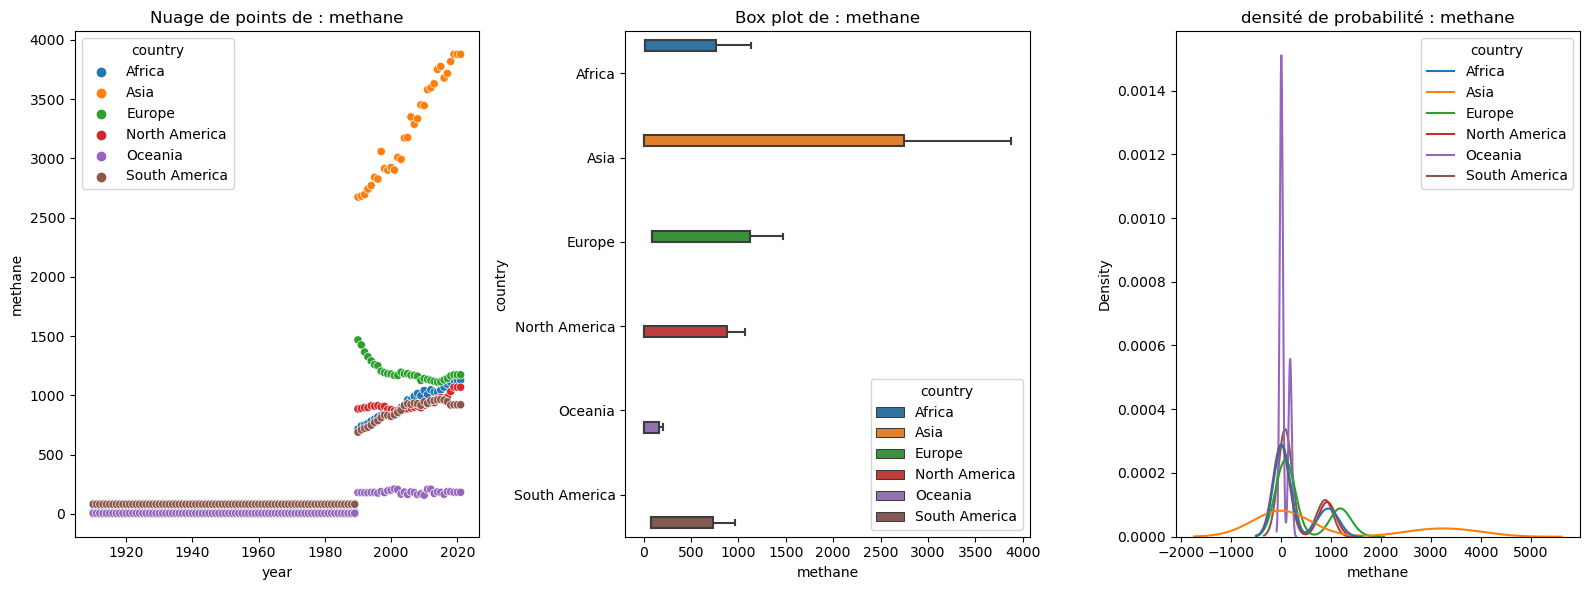

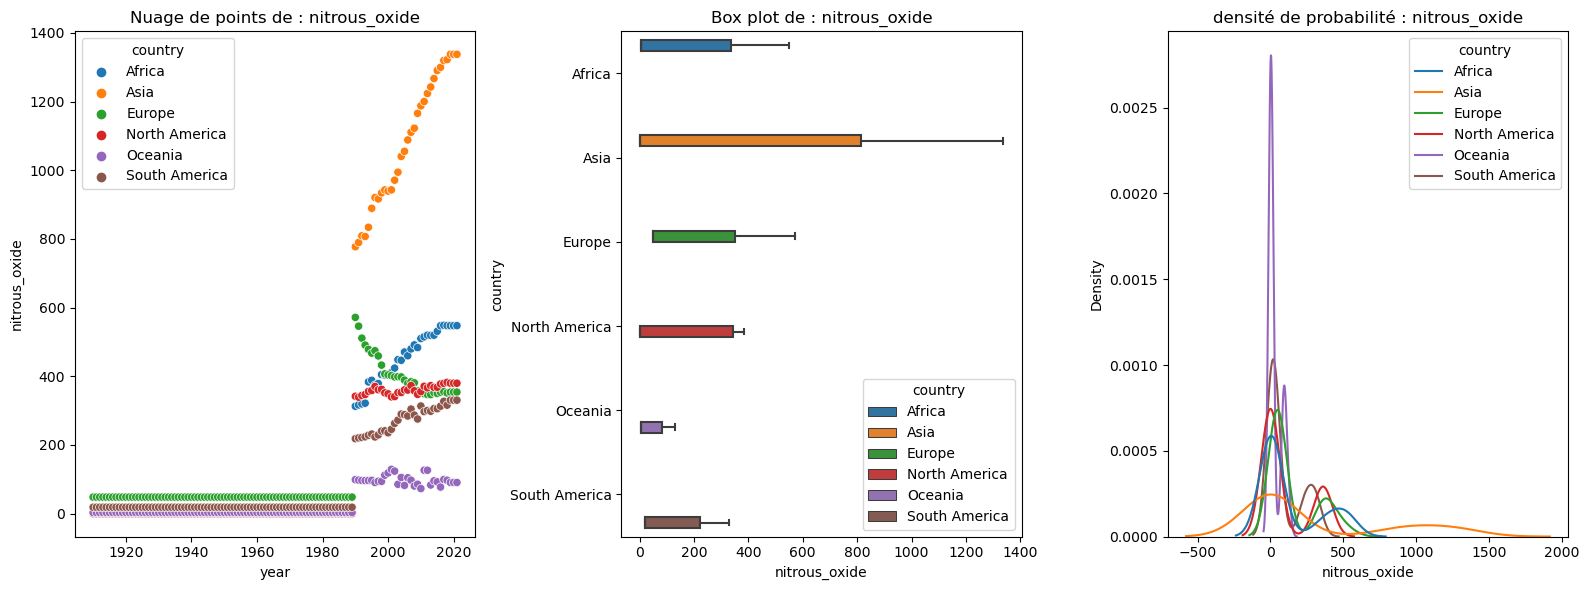

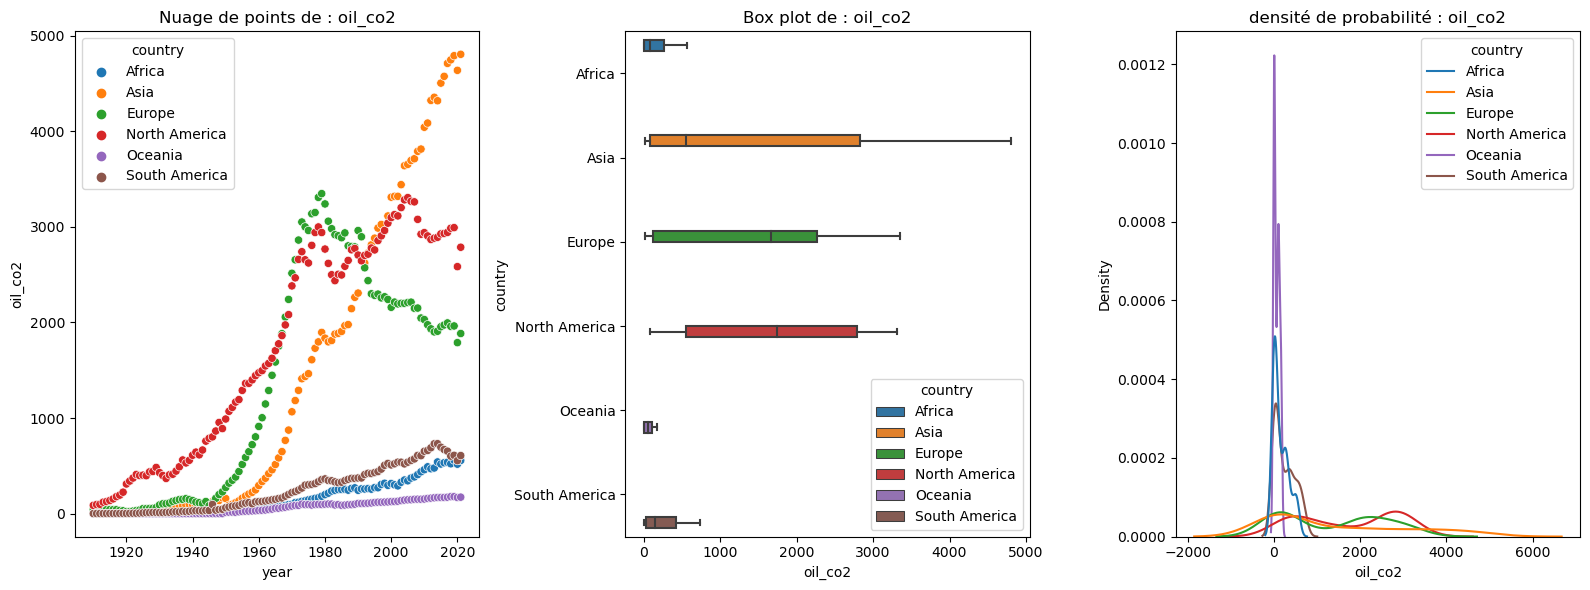

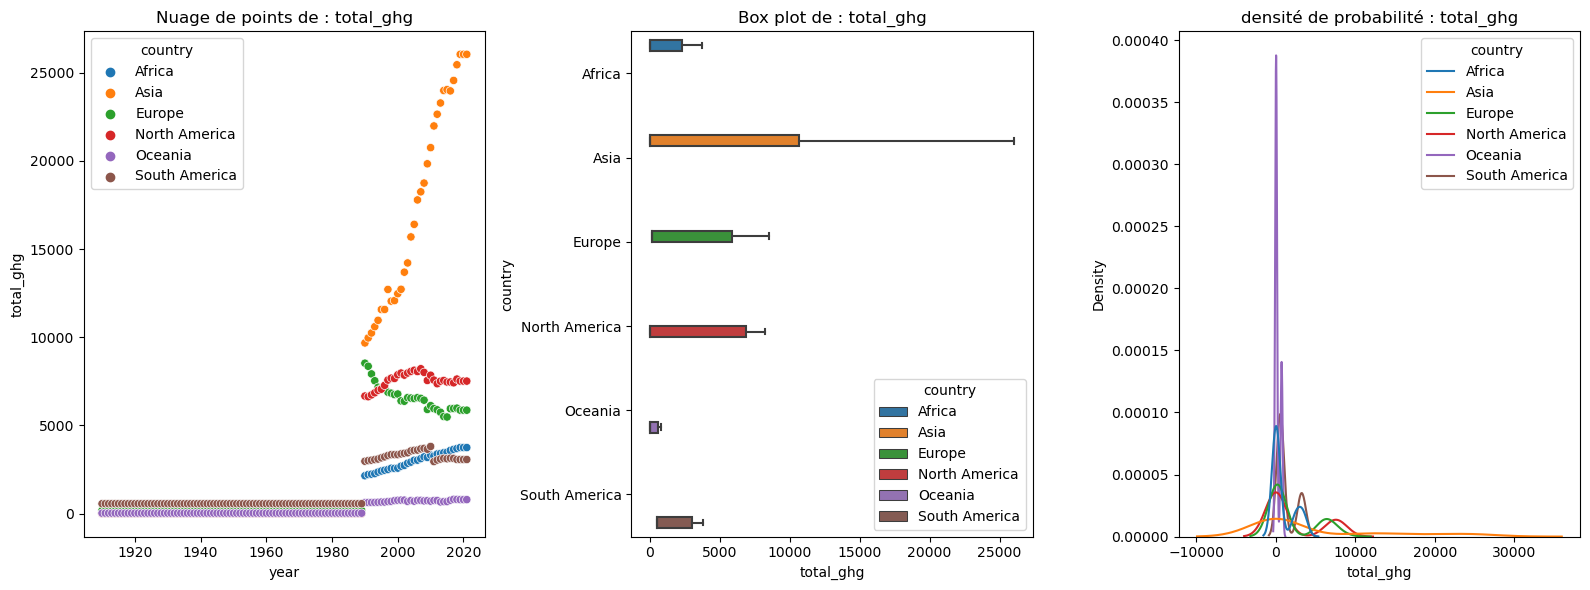

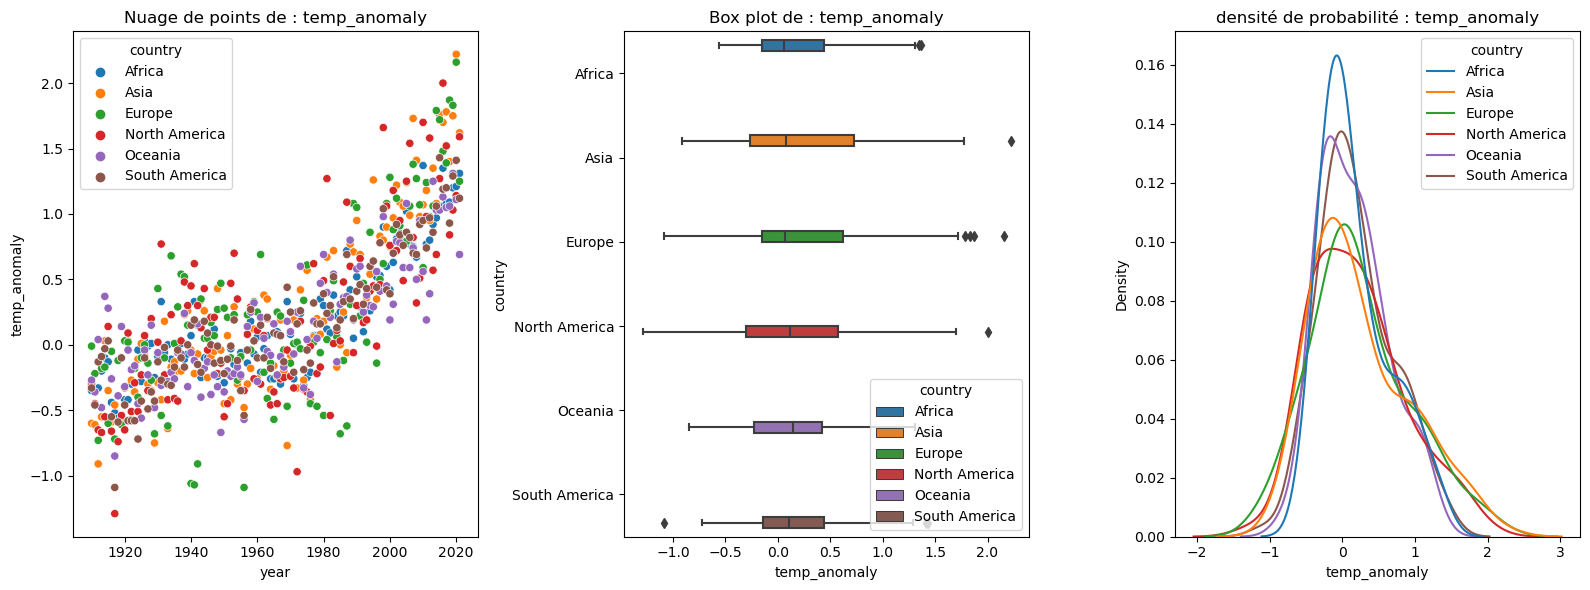

In [ ]:
# scatterplot, boxplot et density pour chaque variable quantitative du df data
for col in data.select_dtypes(include=['float64','int64']).columns[2:]:
    fig, ax = plt.subplots(1, 3, figsize=(16, 6))
    sns.scatterplot(data=data, x='year', y=col, hue='country', ax=ax[0])
    ax[0].set_title('Nuage de points de : ' + col)
    sns.boxplot(data=data, x=col, y='country', hue='country', ax=ax[1])
    ax[1].set_title('Box plot de : ' + col)
    sns.kdeplot(data=data, x=col, hue='country', ax=ax[2])
    ax[2].set_title('densité de probabilité : ' + col)
    plt.tight_layout()
    plt.show();

In [ ]:
# affichage des indicateur statistique et p-value pour chaque variable du df data

# déclaration d'une liste contenant les p-values
p_values = []

# calcul des p-values pour chaque variable
for col in data.columns[1:]:
    stat, p = shapiro(data[col])
    p_values.append([p])

# Affichage du tableau de statistiques avec la p-value pour chaque variable    
df_p_values = pd.DataFrame(p_values, columns=['p-value'], index=data.columns[1:])
data.describe().append(df_p_values.T)

/tmp/ipykernel_1432/755368829.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.describe().append(df_p_values.T)


year    population    cement_co2           co2  \
count    6.720000e+02  6.720000e+02  6.720000e+02  6.720000e+02   
mean     1.965500e+03  6.625490e+08  6.706167e+01  2.420925e+03   
std      3.235441e+01  9.305657e+08  1.811304e+02  3.550164e+03   
min      1.910000e+03  6.992770e+06  0.000000e+00  1.086700e+01   
25%      1.937750e+03  1.418069e+08  1.411250e+00  1.692798e+02   
50%      1.965500e+03  3.645779e+08  1.311550e+01  8.211215e+02   
75%      1.993250e+03  7.248193e+08  5.304425e+01  3.600495e+03   
max      2.021000e+03  4.693332e+09  1.358534e+03  2.168899e+04   
p-value  1.515531e-13  1.124080e-34  5.815389e-43  1.352424e-33   

         co2_per_capita      coal_co2   flaring_co2       gas_co2  \
count      6.720000e+02  6.720000e+02  6.720000e+02  6.720000e+02   
mean       5.075699e+00  1.100132e+03  2.746173e+01  3.776099e+02   
std        4.824895e+00  1.764846e+03  3.828249e+01  6.457939e+02   
min        1.090000e-01  9.178000e+00  0.000000e+00  0.000000e+00   
25%        1.013000e+00  6.596200e+01  0.000000e+00  9.302500e-01   
50%        3.114000e+00  3.022710e+02  7.924500e+00  4.661150e+01   
75%        9.794500e+00  1.596458e+03  4.594475e+01  3.059485e+02   
max        1.629500e+01  1.195901e+04  2.303750e+02  3.242854e+03   
p-value    1.156511e-24  1.652055e-36  4.382209e-31  4.000429e-35   

              methane  nitrous_oxide       oil_co2     total_ghg  temp_anomaly  
count    6.720000e+02   6.720000e+02  6.720000e+02  6.720000e+02  6.720000e+02  
mean     3.736550e+02   1.361212e+02  8.342669e+02  1.932248e+03  2.021131e-01  
std      7.532326e+02   2.589166e+02  1.160620e+03  4.270070e+03  5.837399e-01  
min      0.000000e+00   0.000000e+00  0.000000e+00  1.000000e-02 -1.290000e+00  
25%      4.540000e+00   3.400000e+00  4.227200e+01  2.698000e+01 -2.125000e-01  
50%      8.022000e+01   1.861000e+01  1.992540e+02  1.833700e+02  8.000000e-02  
75%      1.869775e+02   1.005750e+02  1.436954e+03  7.572000e+02  5.425000e-01  
max      3.877760e+03   1.337940e+03  4.806574e+03  2.604854e+04  2.220000e+00  
p-value  1.695011e-38   2.953612e-37  1.191828e-31  1.823772e-39  1.616876e-11

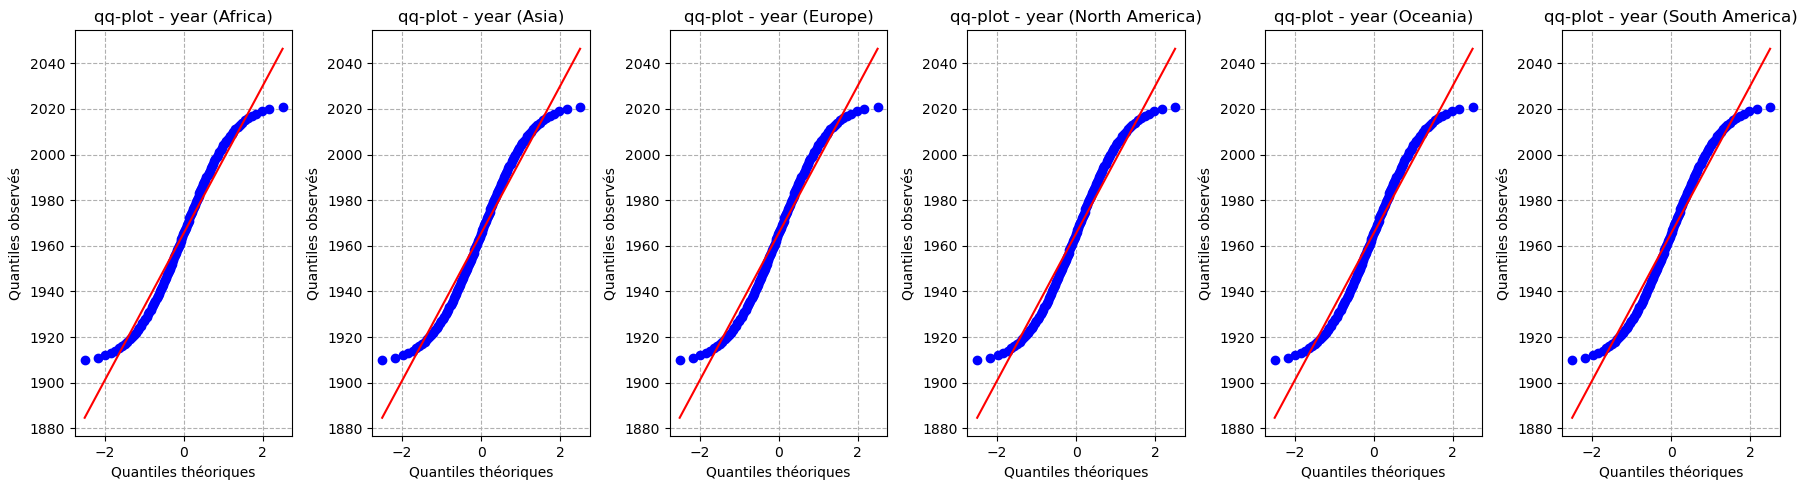

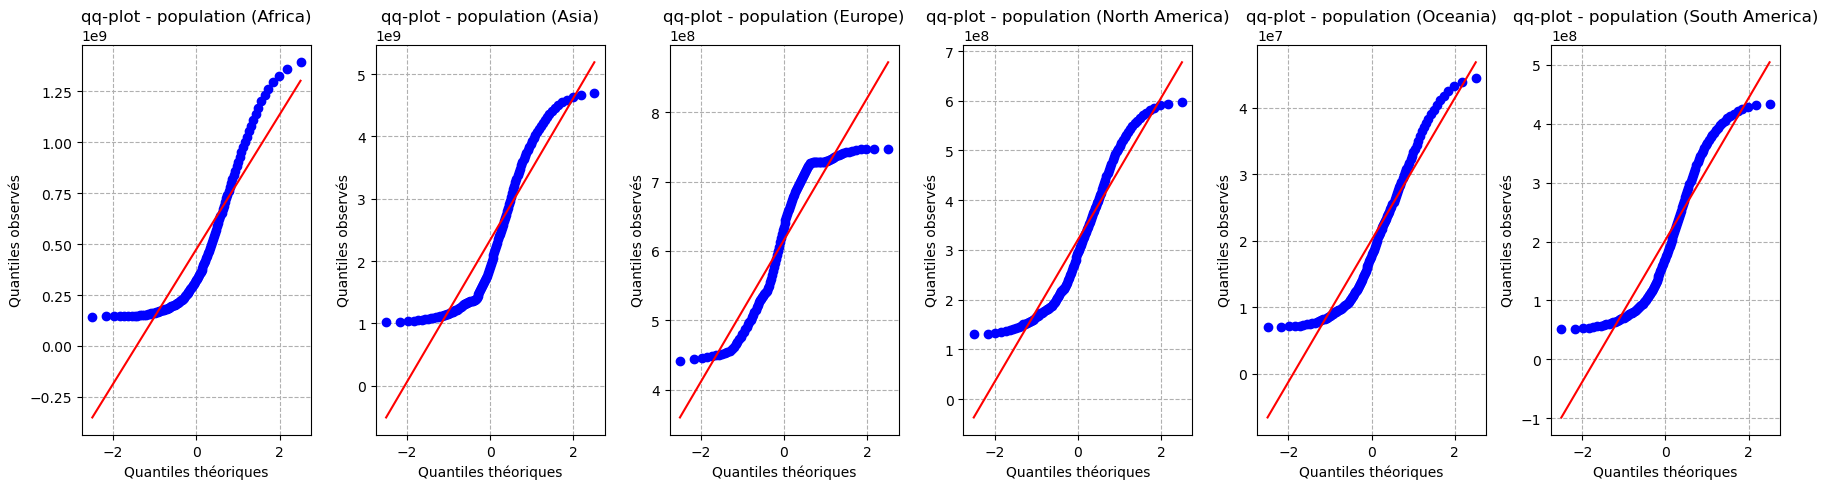

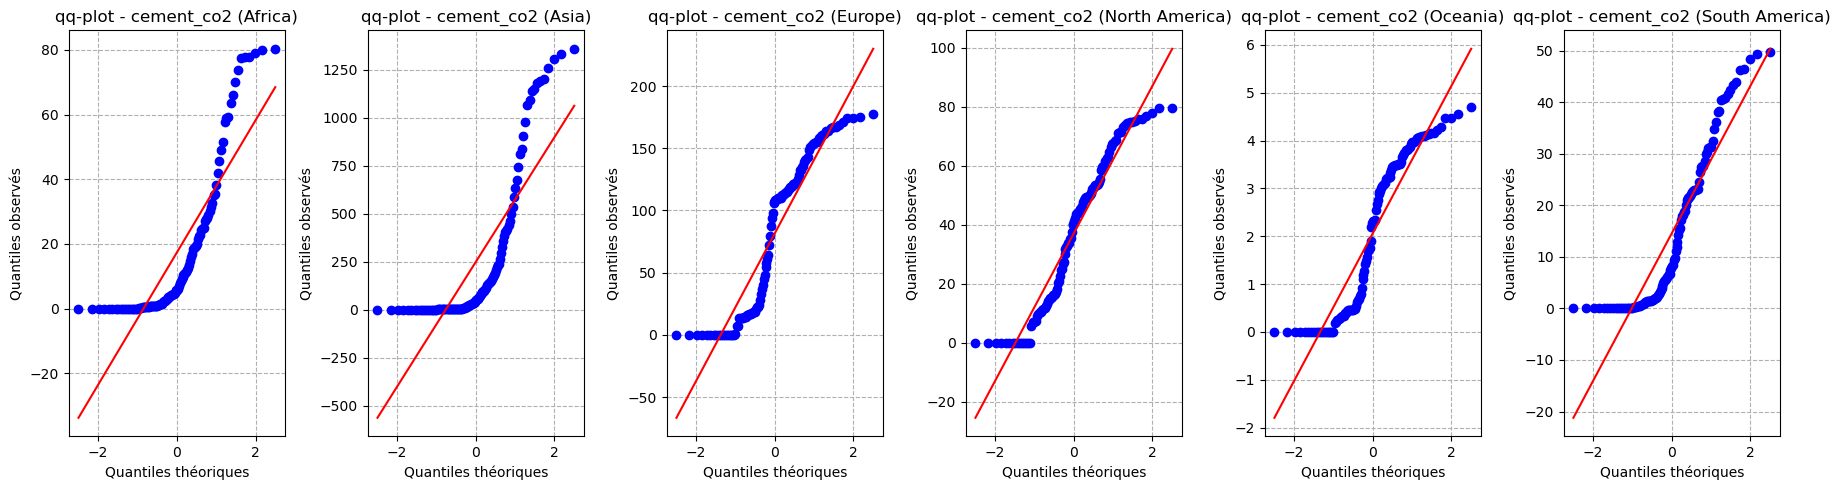

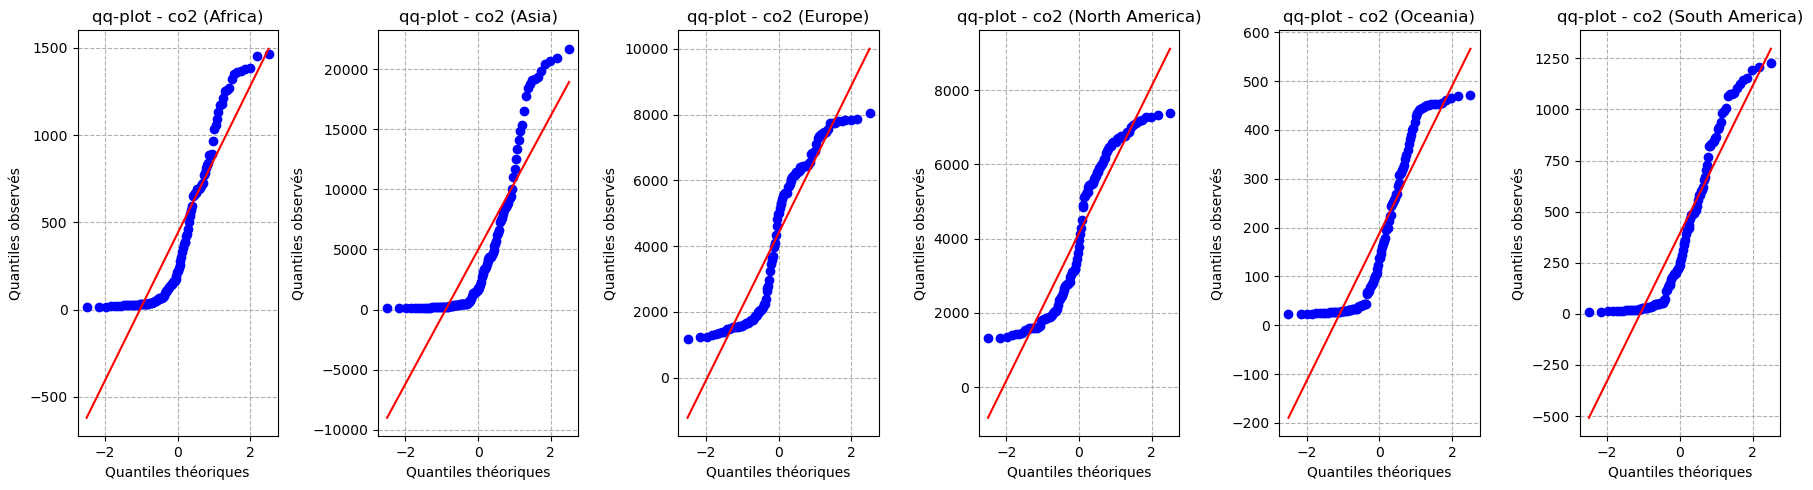

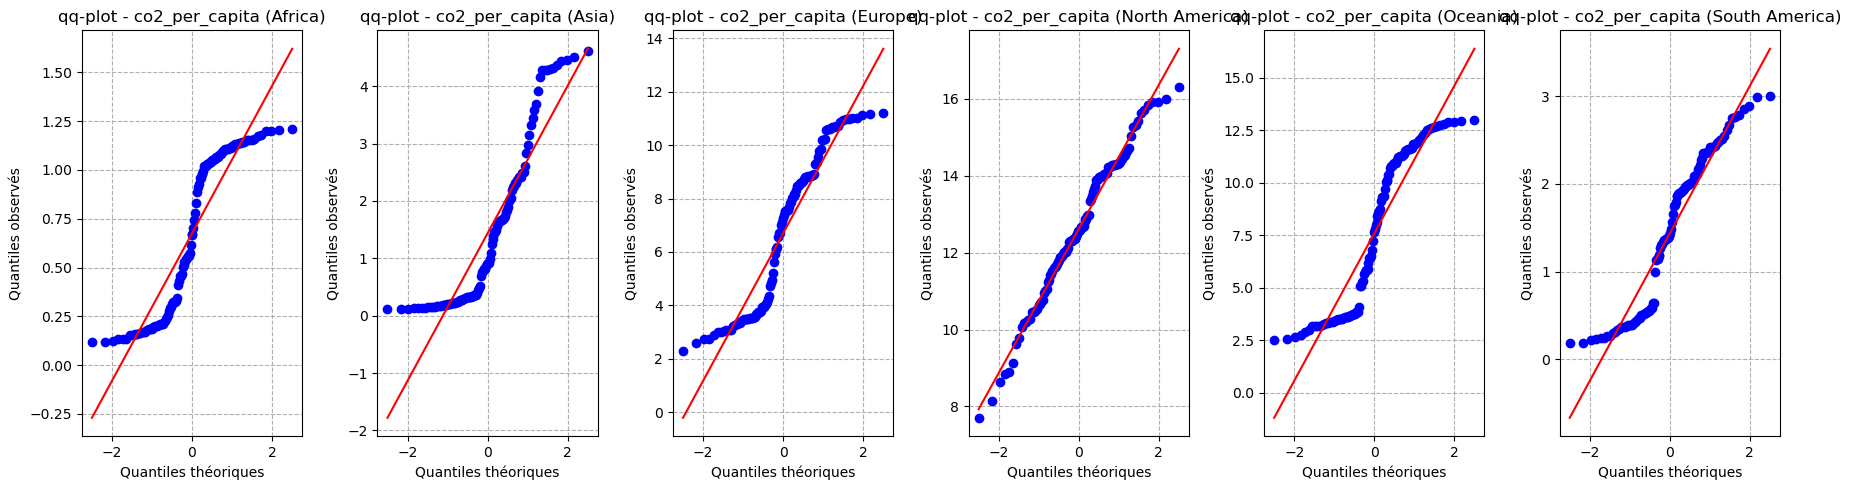

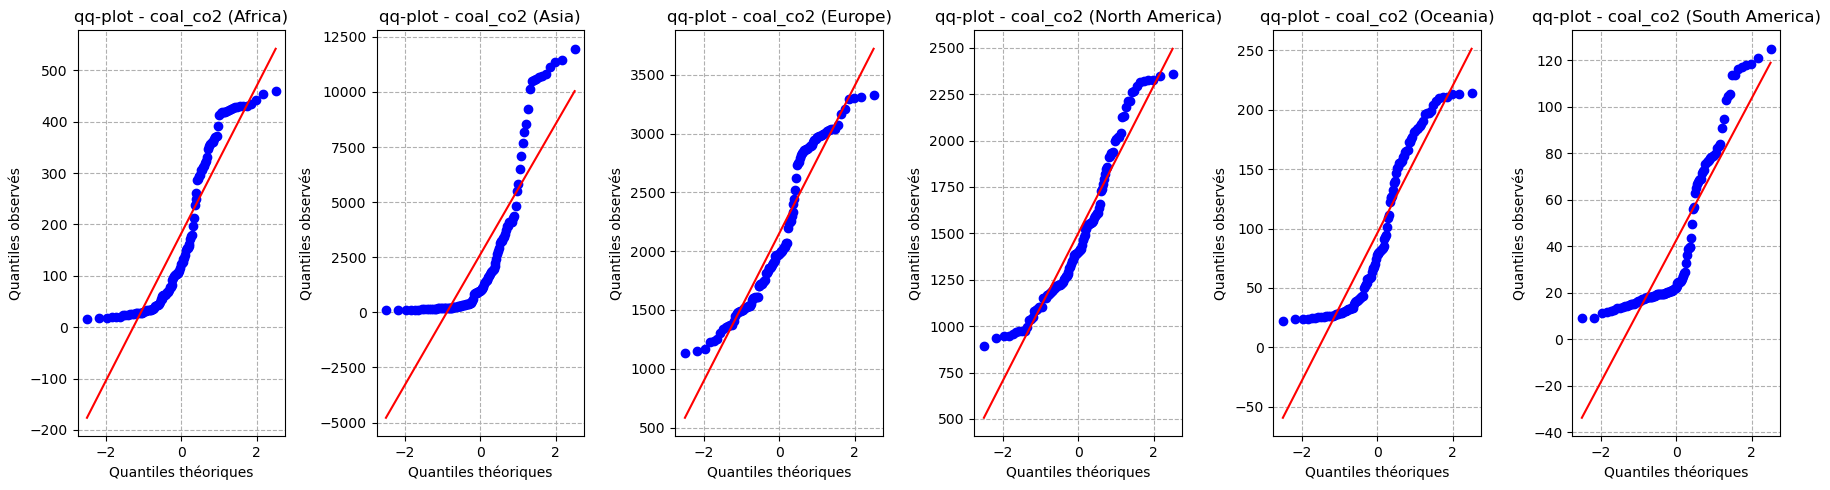

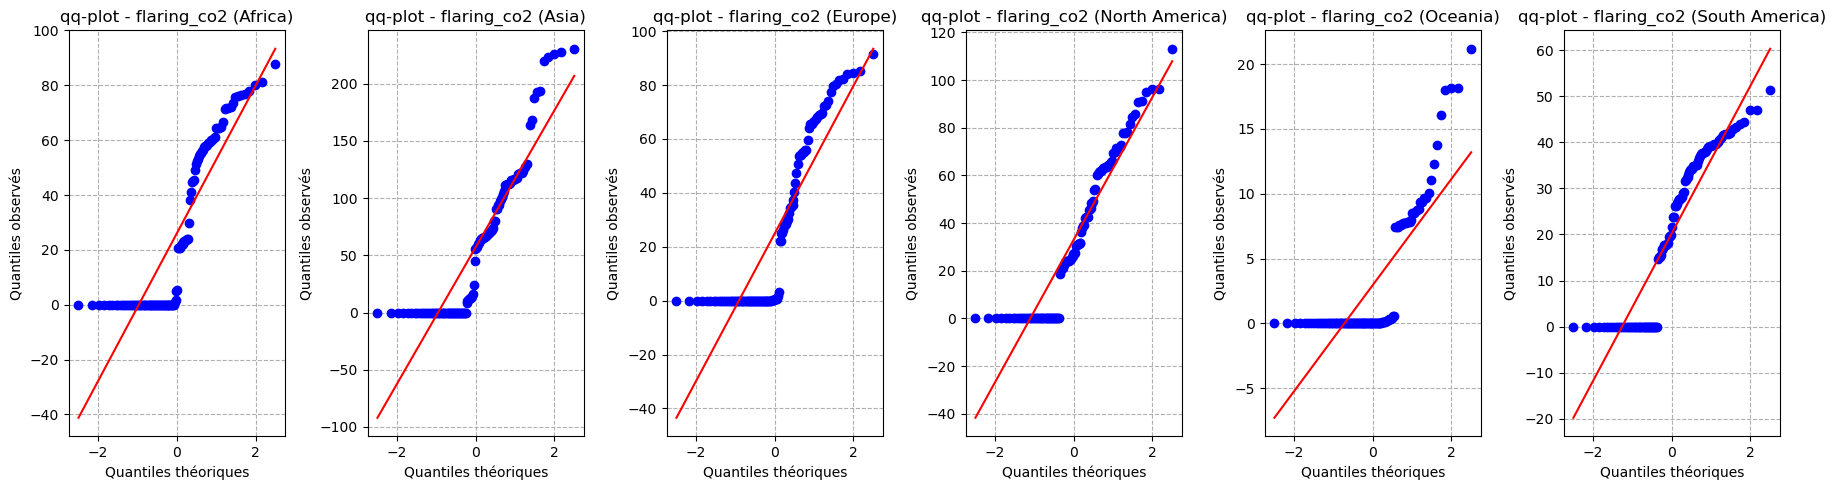

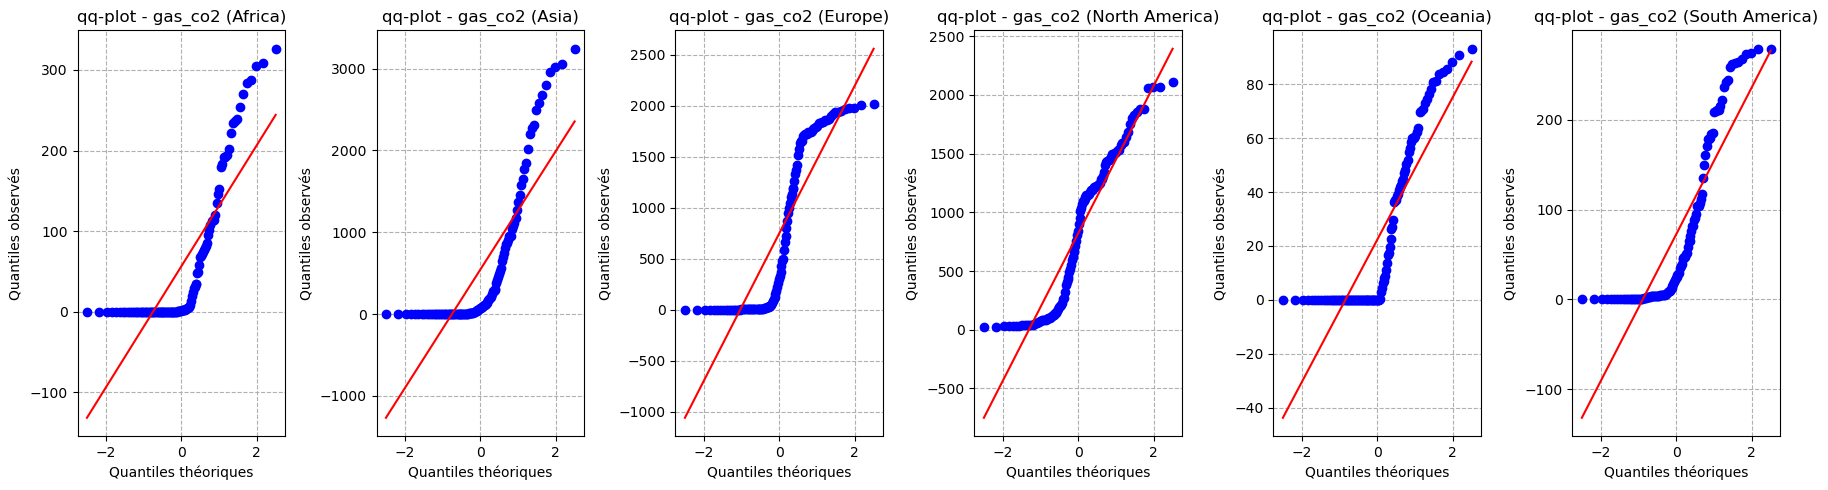

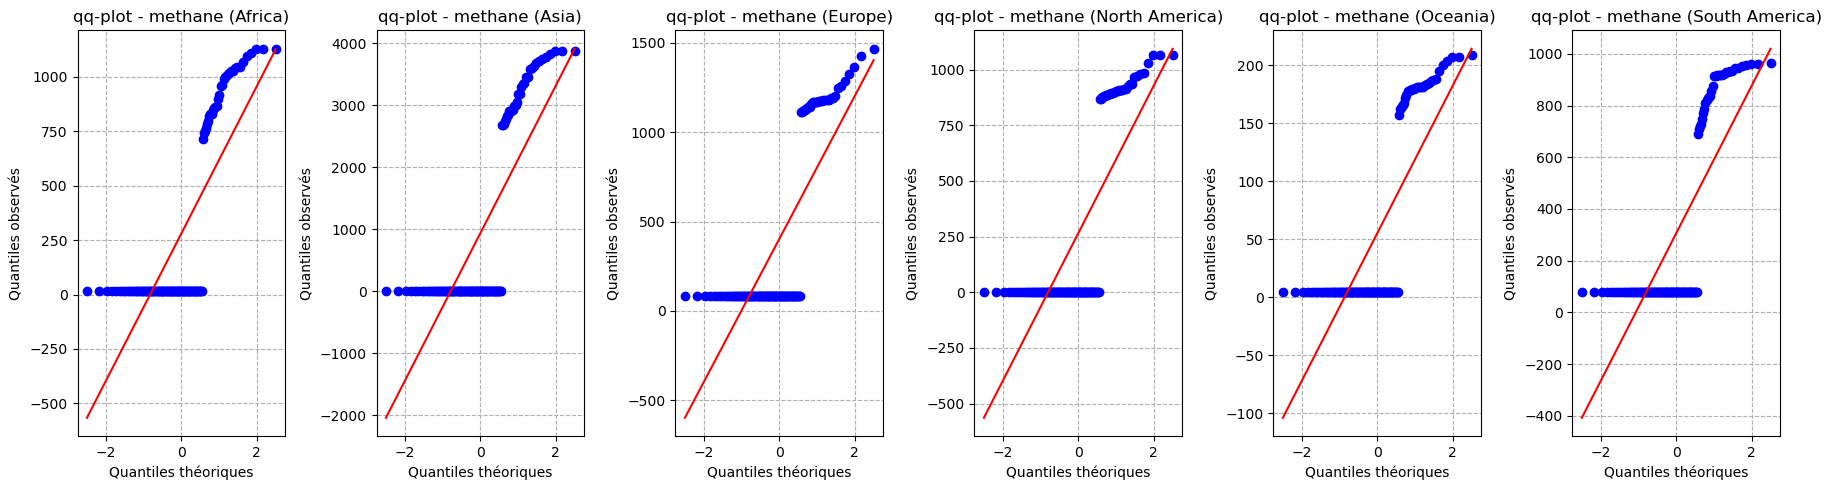

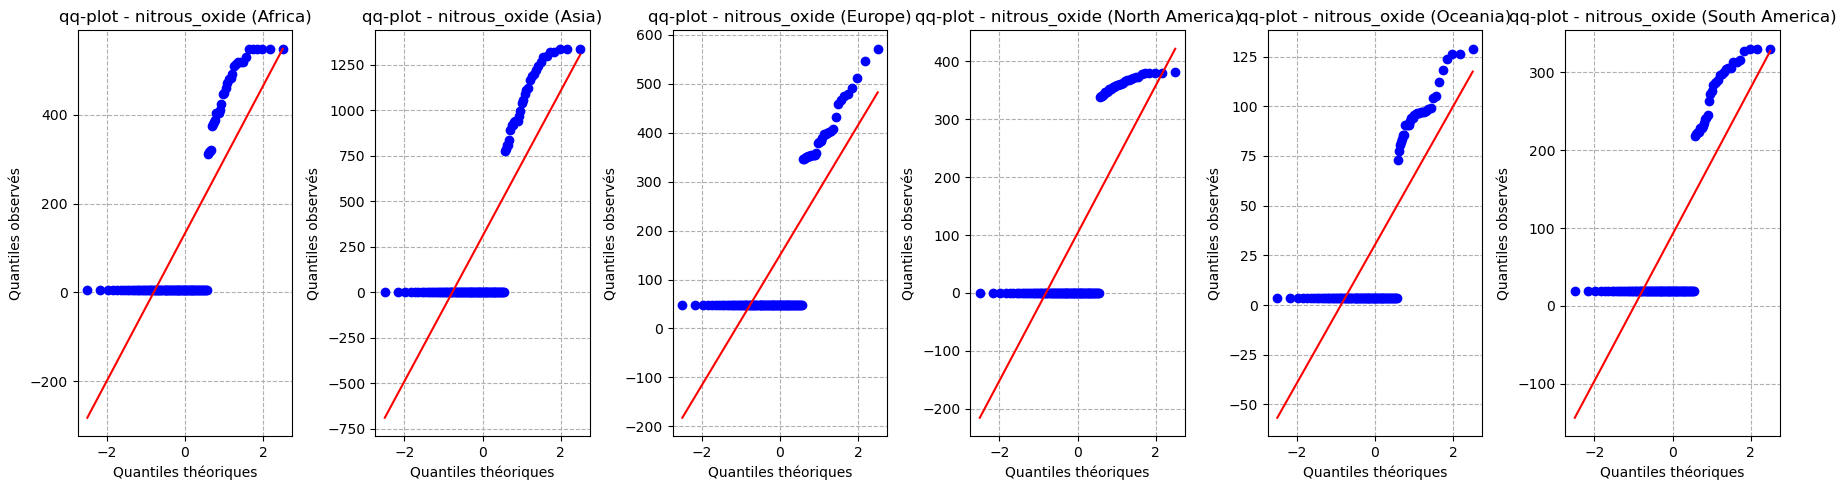

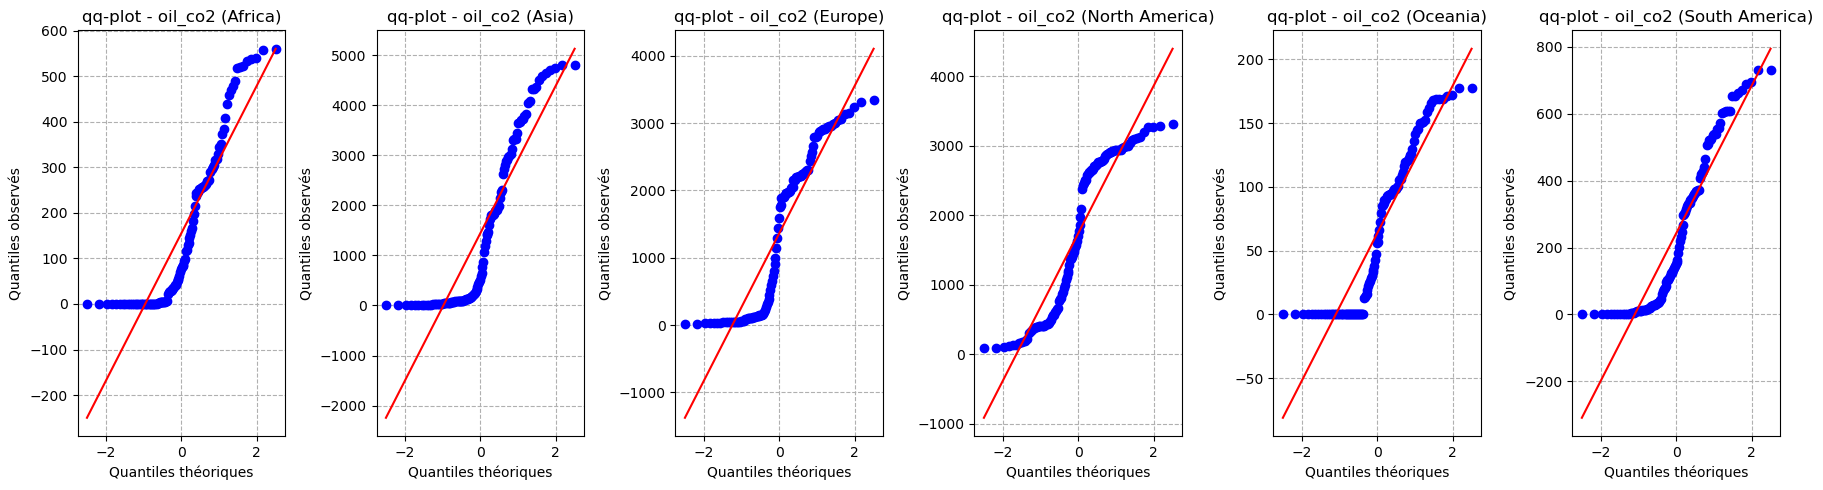

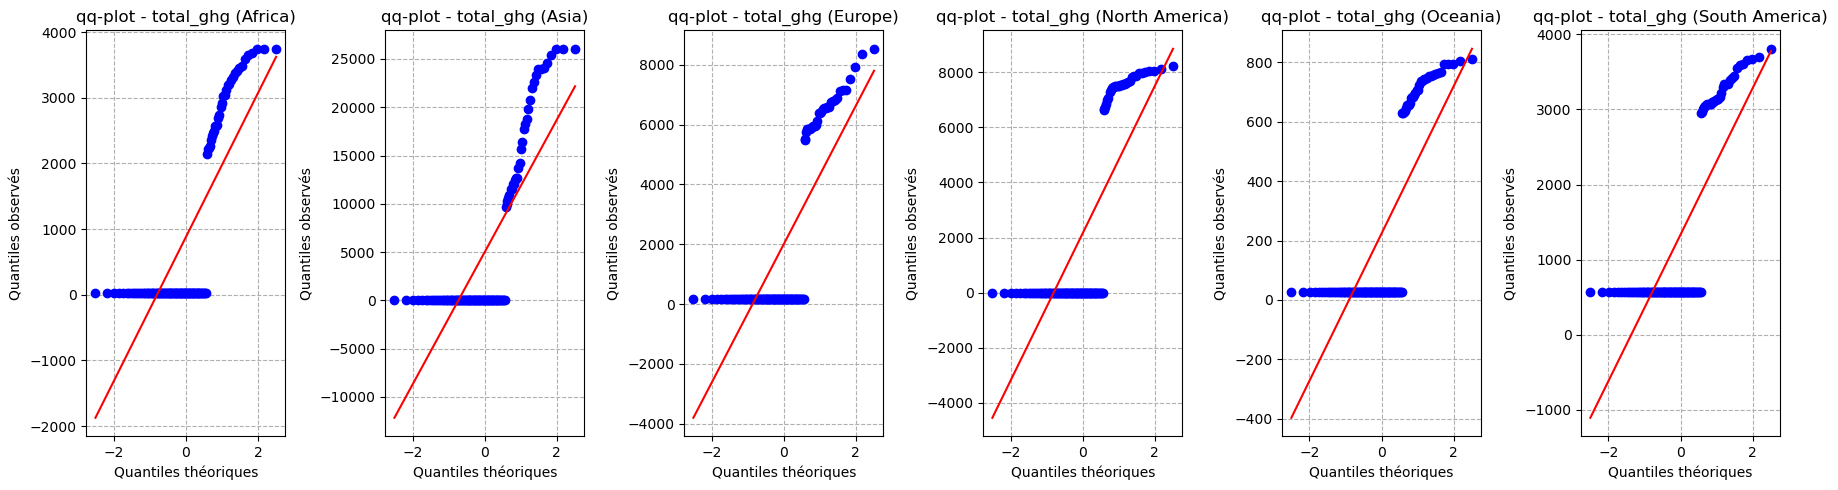

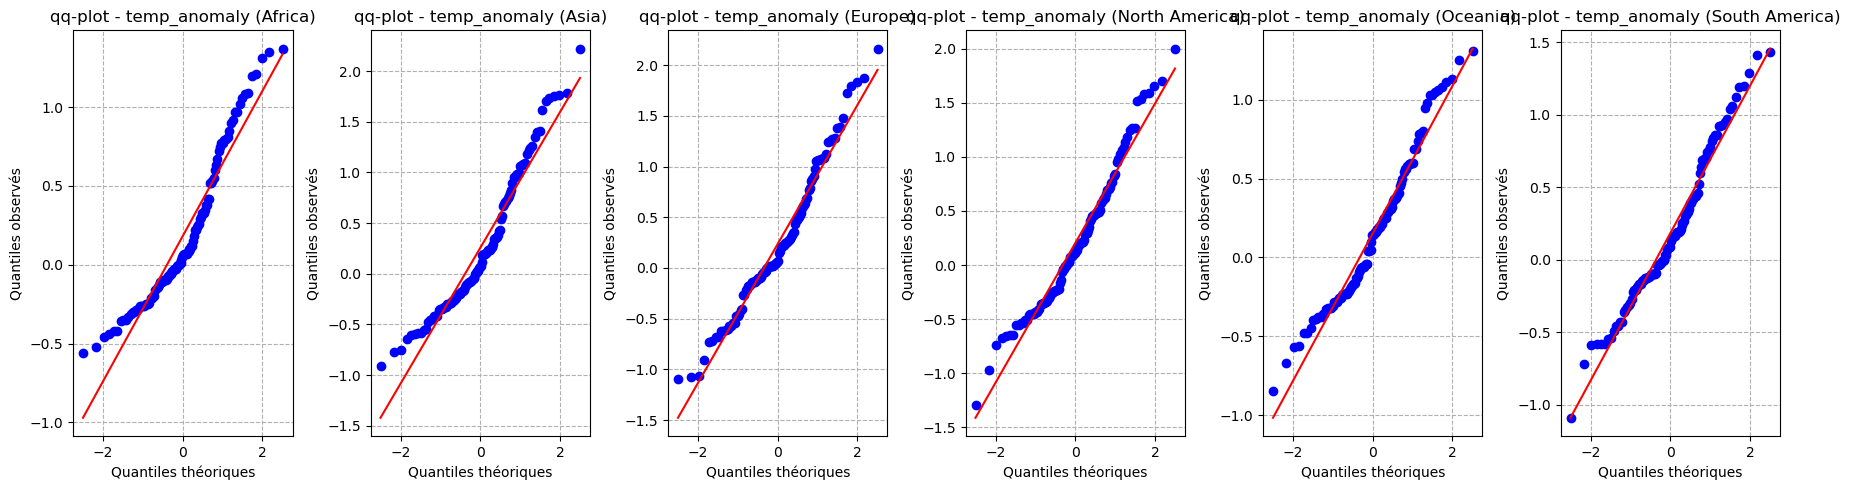

In [ ]:
# Catégories uniques de la colonne "country"
categories = data['country'].unique()

# Itérer sur les colonnes
for col in data.columns[1:]:
    # Créer la figure et les sous-graphiques
    fig, axs = plt.subplots(1, len(categories), figsize=(18, 5))

    # Itérer sur les catégories et afficher les graphiques
    for i, cat in enumerate(categories):
        ax = axs[i]
        subset_data = data[data['country'] == cat]
        stats.probplot(subset_data[col], dist="norm", plot=ax)
        ax.set_xlabel('Quantiles théoriques')
        ax.set_ylabel('Quantiles observés')
        ax.set_title('qq-plot - ' + col + ' (' + cat + ')')
        ax.grid(True, linestyle='--')

    plt.tight_layout()
    plt.show()

<div class="alert alert-block alert-success">
A vous de jouer pour interpreter ces résultats, c'est ça aussi le boulot de Data Analyst
    </div>